## Figure 5 

This manuscript generates figure 5 and relavent data of the paper. 

Kexin Dong

June 3, 2024  

In [1]:
import bioh2m as h2m
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import requests
import time
from adjustText import adjust_text
import matplotlib.patheffects as PathEffects
import seaborn as sns
import scipy.stats
from matplotlib.ticker import FixedLocator, FuncFormatter
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Arial']

/Users/kexindong/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(
/Users/kexindong/Library/Python/3.9/lib/python/site-packages/Bio/pairwise2.py:278: BiopythonDeprecationWarning: Bio.pairwise2 has been deprecated, and we intend to remove it in a future release of Biopython. As an alternative, please consider using Bio.Align.PairwiseAligner as a replacement, and contact the Biopython developers if you still need the Bio.pairwise2 module.
  warnings.warn(


## 5b 

The percentages of mutations of genes  in the H2M Database that can be modeled in the mouse genome, stratified by modeling strategy.

In [2]:
df_result = pd.read_csv('/Users/kexindong/Documents/GitHub/Output/paralog/h2h_result.csv')

In [3]:
df_result.drop_duplicates(subset='index')['class'].value_counts()

class
0    7324
4    6014
1    2254
2     633
Name: count, dtype: int64

In [4]:
input = len(df_result.drop_duplicates(subset='index'))


In [ ]:
input

16225

In [ ]:
output/input

0.6293374422187982

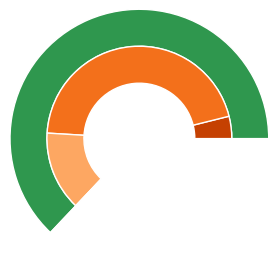

In [ ]:
fig, ax = plt.subplots(figsize=(3,3), nrows = 1, ncols = 1)
output, n_0,n_1,n_2,n_3 = 7324+2254+633, 7324, 2254, 633, 0
ax.axis('equal')
mypie2, _ = ax.pie([output+n_3, input-output-n_3], radius=1.4, colors=[plt.cm.Greens(0.7),'white'], startangle=0)
plt.setp(mypie2, width=0.4, edgecolor='white')

mypie3, _ = ax.pie([n_2,n_0,n_1,n_3,input-(n_0+n_1+n_2+n_3)], radius=1, colors=[plt.cm.Oranges(0.8), plt.cm.Oranges(0.6),plt.cm.Oranges(0.4),'grey','white'], startangle=0)
plt.setp(mypie3, width=0.4, edgecolor='white')
ax.margins(0,0)

plt.savefig(f'/Users/kexindong/Documents/GitHub/Output/h2m_database/figures/database/pie_plot_paralog.pdf', bbox_inches='tight')
plt.show()

## 5c  

The relationship between AlphaMissense pathogenicity scores for human SMARCA4 and SMARCA2 mutation pairs, log-scaled.

In [6]:
df_h2m = pd.read_csv('/Users/kexindong/Documents/GitHub/Output/paralog/smarca.csv')

In [6]:
df_h2m

,gene_name_h_1,HGVSp_h_1,class,status,gene_name_h_2,HGVSp_h_2,flank_size,am_pathogenicity_1,am_class_1,am_pathogenicity_2,am_class_2,color_class,color_score,loc_h_1,loc_h_2,color_h2m_1,color_h2m_2
0,SMARCA4,T910M,1,True,SMARCA2,T880M,44,0.9817,pathogenic,0.9940,pathogenic,tab:green,#8b0000,910,880,darkred,darkred
1,SMARCA4,R1243W,0,True,SMARCA2,R1213W,82,0.9966,pathogenic,0.9959,pathogenic,tab:orange,#8b0000,1243,1213,darkred,darkred
2,SMARCA4,R1192H,0,True,SMARCA2,R1162H,82,0.9965,pathogenic,0.9968,pathogenic,tab:orange,#8b0000,1192,1162,darkred,darkred
3,SMARCA4,R1192C,0,True,SMARCA2,R1162C,82,0.9984,pathogenic,0.9969,pathogenic,tab:orange,#8b0000,1192,1162,darkred,darkred
4,SMARCA4,E882K,0,True,SMARCA2,E852K,61,0.9993,pathogenic,0.9998,pathogenic,tab:orange,#8b0000,882,852,darkred,darkred
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
656,SMARCA4,R1445C,1,True,SMARCA2,R1370C,13,0.9759,pathogenic,0.9837,pathogenic,tab:green,#8b0000,1445,1370,darkred,darkred
657,SMARCA4,S813L,0,True,SMARCA2,S783L,11,0.9973,pathogenic,0.9950,pathogenic,tab:orange,#8b0000,813,783,darkred,darkred
658,SMARCA4,F1121L,0,True,SMARCA2,F1091L,0,0.9871,pathogenic,0.9088,pathogenic,tab:orange,#8b0000,1121,1091,darkred,darkred
659,SMARCA4,D1183Y,0,True,SMARCA2,D1153Y,81,0.9985,pathogenic,0.9975,pathogenic,tab:orange,#8b0000,1183,1153,darkred,darkred


In [9]:
p_corr, p_value = scipy.stats.pearsonr(df_h2m['am_pathogenicity_1'], df_h2m['am_pathogenicity_2'])

print("Pearson Correlation Coefficient: {:.4f}".format(p_corr))
print(p_value)

Pearson Correlation Coefficient: 0.9281
6.774372165207511e-285


In [10]:
corr, p_value = scipy.stats.spearmanr(df_h2m['am_pathogenicity_1'], df_h2m['am_pathogenicity_2'])

print("Spearman Correlation Coefficient: {:.4f}".format(corr))
print(p_value)

Spearman Correlation Coefficient: 0.9563
0.0


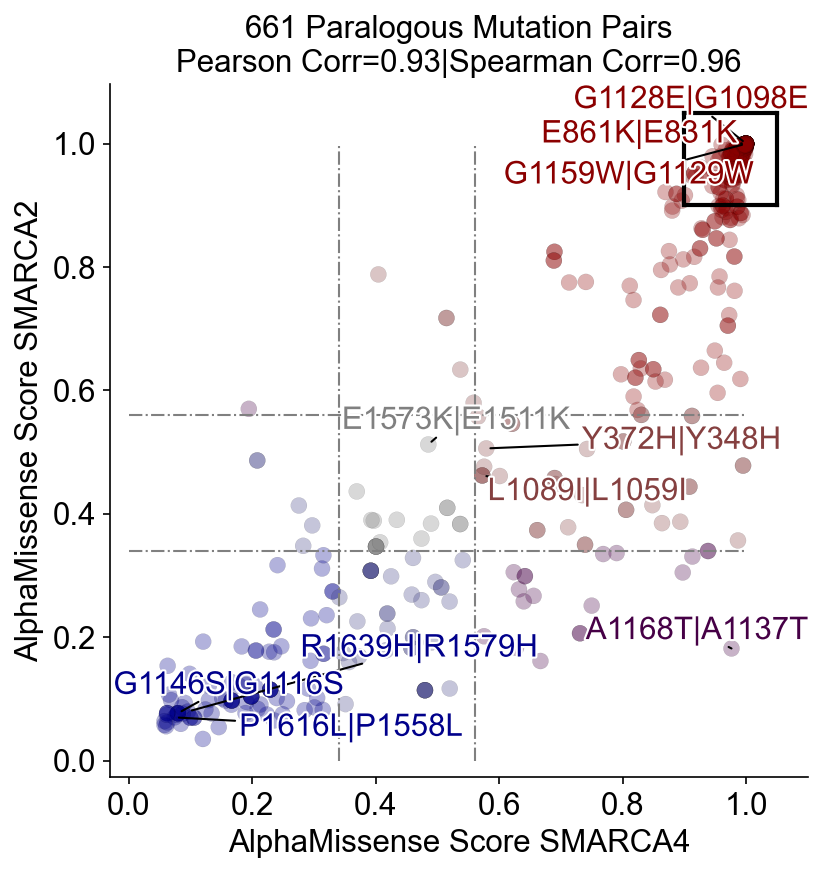

In [28]:
gene_1 = 'SMARCA4'
gene_2 = 'SMARCA2'

bbb1 = df_h2m[(df_h2m['am_pathogenicity_1'] >= .9997) & (df_h2m['am_pathogenicity_2'] >= .9997) &(df_h2m['status'] == True)].iloc[:3,:]
bbb2 = df_h2m[(df_h2m['am_pathogenicity_1'] >= .4) & (df_h2m['am_pathogenicity_1'] <= .6) & (df_h2m['am_pathogenicity_2'] <= .6) & (df_h2m['am_pathogenicity_2'] >= .4)].iloc[:3,:]
bbb3 = df_h2m[(df_h2m['am_pathogenicity_1'] <= .097) & (df_h2m['am_pathogenicity_2'] <= .097) &(df_h2m['status'] == True)].iloc[:3,:]
bbb4 = df_h2m[(df_h2m['am_pathogenicity_1'] <= .3) & (df_h2m['am_pathogenicity_2'] >= .8) &(df_h2m['status'] == True)].iloc[:3,:]
bbb5 = df_h2m[(df_h2m['am_pathogenicity_1'] >= .8) & (df_h2m['am_pathogenicity_2'] <= .3) &(df_h2m['status'] == True)].iloc[:3,:]

bb2 = pd.concat((bbb1, bbb2,bbb3, bbb4, bbb5))

t = [f'{x}|{y}' for x,y in zip(bb2['HGVSp_h_1'], bb2['HGVSp_h_2'])]
x = list(bb2['am_pathogenicity_1'])
y = list(bb2['am_pathogenicity_2'])
c = list(bb2['color_class'])

fig, ax = plt.subplots(figsize=(6, 6), dpi=150)
ax.axis('equal')
ax.plot([0, 1], [0.56, 0.56], linewidth=1, linestyle='-.', color='grey')
ax.plot([0, 1], [0.34, 0.34], linewidth=1, linestyle='-.', color='grey')

ax.plot( [0.56, 0.56], [0, 1],linewidth=1, linestyle='-.', color='grey')
ax.plot([0.34, 0.34], [0, 1], linewidth=1, linestyle='-.', color='grey')

ax.plot([.9, 1.05], [0.9, 0.9], linewidth=2, linestyle='-', color='black')
ax.plot([.9, 1.05], [1.05, 1.05], linewidth=2, linestyle='-', color='black')

ax.plot( [1.05, 1.05],[.9, 1.05],linewidth=2, linestyle='-', color='black')
ax.plot([0.9, 0.9],[.9, 1.05], linewidth=2, linestyle='-', color='black')


c = list(bb2['color_score'])
ax.scatter(data=df_h2m, x='am_pathogenicity_1', y='am_pathogenicity_2', c = 'color_score', alpha=.3, s=60, edgecolor='black', linewidths=.1)

ax.set_xlim(-.03, 1.1)
ax.set_ylim(-.03, 1.1)
ax.set_ylabel(f"AlphaMissense Score {gene_2}", fontsize=15)
ax.set_xlabel(f"AlphaMissense Score {gene_1}", fontsize=15)
ax.set_title(f"{len(df_h2m)} Paralogous Mutation Pairs\nPearson Corr={p_corr:.2f}|Spearman Corr={corr:.2f}", fontsize=15)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.tick_params(axis='both', which='major', labelsize=15)
texts = [ax.text(x[i], y[i], t[i], fontsize=15, color=c[i], path_effects=[PathEffects.withStroke(linewidth=2, foreground="w")]) for i in range(len(x))]
adjust_text(texts,only_move={'texts':'xy'}, ax=ax, arrowprops=dict(arrowstyle="-", linewidth=1, alpha=1, color='black'))
plt.savefig(f'/Users/kexindong/Documents/GitHub/Output/h2m_database/figures/paralog/smarca_paralog_score_colored.pdf', bbox_inches='tight')
plt.show()

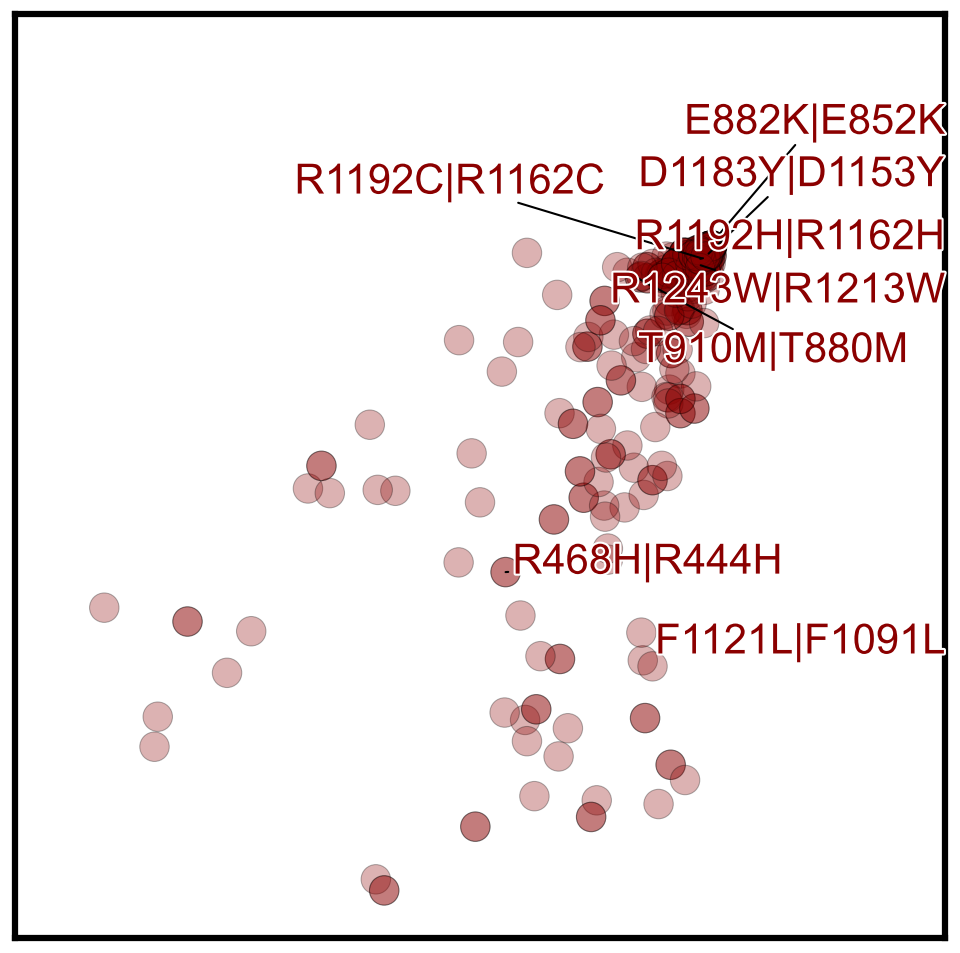

In [47]:
gene_1 = 'SMARCA4'
gene_2 = 'SMARCA2'

bbb1 = df_h2m[(df_h2m['am_pathogenicity_1'] >= .8) & (df_h2m['am_pathogenicity_2'] >= .8) &(df_h2m['status'] == True)].iloc[:5,:]
bbb2 = df_h2m.iloc[[-2,-3,-18],:]
bb2 = pd.concat([bbb1, bbb2]).drop_duplicates()
t = [f'{x}|{y}' for x,y in zip(bb2['HGVSp_h_1'], bb2['HGVSp_h_2'])]
x = list(bb2['am_pathogenicity_1'])
y = list(bb2['am_pathogenicity_2'])
c = list(bb2['color_class'])

fig, ax = plt.subplots(figsize=(8, 8), dpi=150)
ax.plot([0, 1], [0.56, 0.56], linewidth=1, linestyle='-.', color='grey')
ax.plot([0, 1], [0.34, 0.34], linewidth=1, linestyle='-.', color='grey')

ax.plot( [0.56, 0.56], [0, 1],linewidth=1, linestyle='-.', color='grey')
ax.plot([0.34, 0.34], [0, 1], linewidth=1, linestyle='-.', color='grey')

c = list(bb2['color_score'])
ax.scatter(data=df_h2m, x='am_pathogenicity_1', y='am_pathogenicity_2', c = 'color_score', alpha=.3, s=200, edgecolor='black', linewidths=.5)

ax.set_xlim(.85, 1.05)
ax.set_ylim(.85, 1.05)
ax.set_ylabel(f"", fontsize=10)
ax.set_xlabel(f"", fontsize=10)
ax.set_title(f"", fontsize=10)
ax.spines['top'].set_linewidth(3)  
ax.spines['bottom'].set_linewidth(3) 
ax.spines['left'].set_linewidth(3) 
ax.spines['right'].set_linewidth(3) 
boundaries_ = []
ax.xaxis.set_ticks(boundaries_)
ax.xaxis.set_ticklabels(boundaries_, size=30, fontweight=100)
ax.yaxis.set_ticks(boundaries_)
ax.yaxis.set_ticklabels(boundaries_, size=30, fontweight=100)
texts = [ax.text(x[i], y[i], t[i], fontsize=20, color=c[i], path_effects=[PathEffects.withStroke(linewidth=2, foreground="w")]) for i in range(len(x))]
adjust_text(texts,only_move={'texts':'xy'}, ax=ax, arrowprops=dict(arrowstyle="-", linewidth=1, alpha=1, color='black'))
plt.savefig(f'/Users/kexindong/Documents/GitHub/Output/h2m_database/figures/paralog/smarca_paralog_score_colored_zoom.pdf', bbox_inches='tight')
plt.show()

## 5d  
Scatter plot of AlphaMissense scores of mapped SMARCA4 and SMARCA2 mutations, colored by H2M Modeling. No flank size limit. Pathogenicity classification is the same as b. Purple = Gln-Leu-Gln (QLQ) Domain, Red = a helicase SANT-associated (HSA) domain, Yellow = ATP-ase Domain, Orange = SNF2 ATP-coupling (SnAC) domain, Green = Bromo Domain.

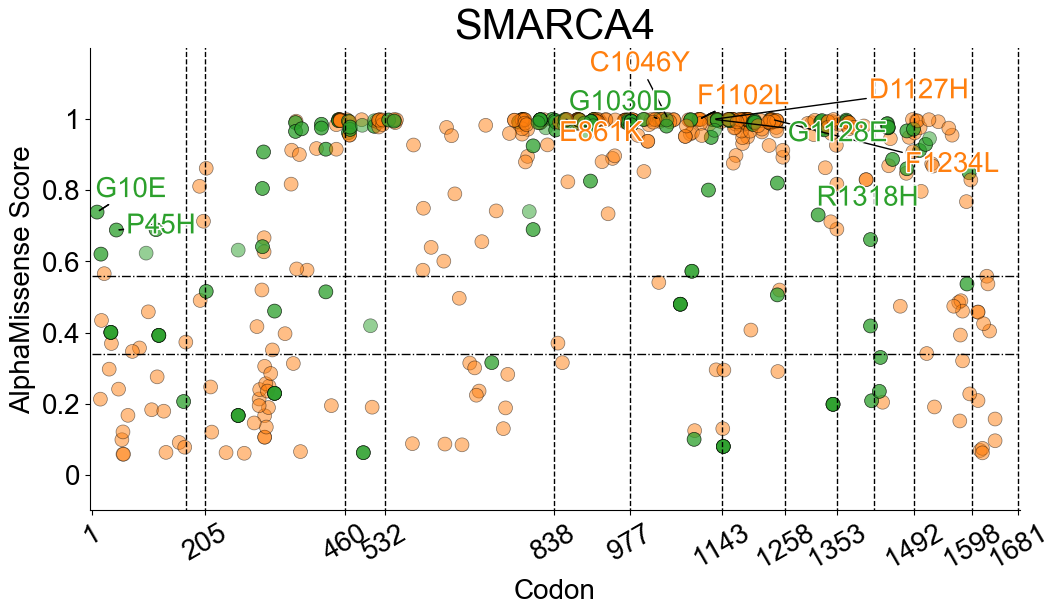

In [95]:
### SMARCA4
fs = 0
df_merged = df_h2m[df_h2m['flank_size'] >= 0].reset_index(drop=True).sort_values(by = 'HGVSp_h_1').reset_index(drop=True)

gene = 'SMARCA4'

bbb1 = df_merged[(df_merged['am_pathogenicity_1'] >= .9997) & (df_merged['status'] == True)].iloc[:10,:]
bbb2 = df_merged[(df_merged['am_pathogenicity_1'] <= .045) & (df_merged['status'] == False)]
bbb3 = df_merged[(df_merged['class'] == 1) & (df_merged['am_pathogenicity_1'] <= .8) & (df_merged['am_pathogenicity_1'] >= .6)].iloc[:5,:]
# top_2 = df_merged['HGVSp_h'].value_counts().index.to_list()[:2]
# bbb3 = df_merged[df_merged['HGVSp_h'].isin(top_2)]
bb2 = pd.concat((bbb1, bbb2,bbb3))

t = list(bb2['HGVSp_h_1'])
x = list(bb2['loc_h_1'])
y = list(bb2['am_pathogenicity_1'])
c = list(bb2['color_h2m_1'])

c = list(bb2['color_class'])
fig, ax = plt.subplots(figsize=(12, 6))
# 绘制散点图
g = ax.scatter(data=df_merged, x='loc_h_1', y='am_pathogenicity_1',  c = 'color_class', alpha=.5, s=100, edgecolor='black', linewidths=.5)

# 绘制参考线
ax.plot([0, 1681], [0.56, 0.56], linewidth=1, linestyle='-.', color='black')
ax.plot([0, 1681], [0.34, 0.34], linewidth=1, linestyle='-.', color='black')
# ax.set_ylim(-6, 6)
ax.set_xlim(-3, 1684)
ax.set_ylim(-.1, 1.2)
ax.set_ylabel(f"AlphaMissense Score", fontsize=20)
ax.set_xlabel("Codon", fontsize=20)
ax.set_title(f"{gene}", fontsize=30)
boundaries = [171,205,460,532,838,977,1143,1258,1353,1420,1492,1598,1681]
boundaries_ = [1,205,460,532,838,977,1143,1258,1353,1492,1598,1681]
ax.xaxis.set_ticks(boundaries_)
ax.xaxis.set_ticklabels(boundaries_, size=20, fontweight=100, rotation = 30)
for bound in boundaries:
    ax.plot([bound, bound], [-6, 6], linewidth=1, linestyle='dashed', color='black')

texts = [ax.text(x[i], y[i], t[i], fontsize=20, color=c[i], path_effects=[PathEffects.withStroke(linewidth=2, foreground="w")]) for i in range(len(x))]
ax.yaxis.set_ticks([0,.2,.4,.6,.8,1])
ax.yaxis.set_ticklabels([0,0.2,0.4,0.6,0.8,1], size=20, fontweight=100)
adjust_text(texts,only_move={'texts':'xy'}, ax=ax, arrowprops=dict(arrowstyle="-", linewidth=1, alpha=1, color='black'))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.tick_params(axis='y', which='major', labelsize=20)
plt.savefig(f'/Users/kexindong/Documents/GitHub/Output/h2m_database/figures/flank_size/smarca_h_fs_{fs}_af_colored.pdf', bbox_inches='tight')
plt.show()

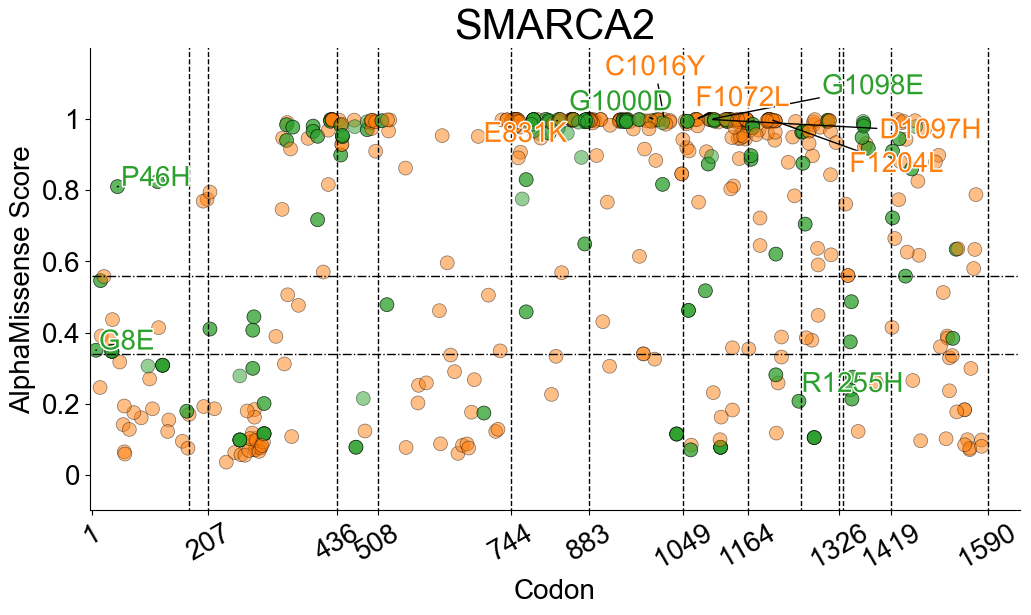

In [96]:
### SMARCA4
fs = 0
df_merged = df_h2m[df_h2m['flank_size'] >= 0].reset_index(drop=True).sort_values(by = 'HGVSp_h_1').reset_index(drop=True)
gene = 'SMARCA2'

# bbb1 = df_merged[(df_merged['am_pathogenicity_2'] >= .9997) & (df_merged['status'] == True)].iloc[:10,:]
# bbb2 = df_merged[(df_merged['am_pathogenicity_2'] <= .045) & (df_merged['status'] == False)]
# bbb3 = df_merged[(df_merged['class'] == 1) & (df_merged['am_pathogenicity_2'] <= .8) & (df_merged['am_pathogenicity_2'] >= .6)].iloc[:5,:]
# # top_2 = df_merged['HGVSp_h'].value_counts().index.to_list()[:2]
# # bbb3 = df_merged[df_merged['HGVSp_h'].isin(top_2)]
# bb2 = pd.concat((bbb1, bbb2,bbb3))

t = list(bb2['HGVSp_h_2'])
x = list(bb2['loc_h_2'])
y = list(bb2['am_pathogenicity_2'])
c = list(bb2['color_class'])

fig, ax = plt.subplots(figsize=(12, 6))

g = ax.scatter(data=df_merged, x='loc_h_2', y='am_pathogenicity_2',  c = 'color_class', alpha=.5, s=100, edgecolor='black', linewidths=.5)


ax.plot([0, 1681], [0.56, 0.56], linewidth=1, linestyle='-.', color='black')
ax.plot([0, 1681], [0.34, 0.34], linewidth=1, linestyle='-.', color='black')
# ax.set_ylim(-6, 6)
ax.set_xlim(-3, 1647)
ax.set_ylim(-.1, 1.2)
ax.set_ylabel(f"AlphaMissense Score", fontsize=20)
ax.set_xlabel("Codon", fontsize=20)
ax.set_title(f"{gene}", fontsize=30)
boundaries = [173,207,436,508,744,883,1049,1164,1259,1326,1333,1419,1590]
boundaries_ = [1,207,436,508,744,883,1049,1164,1326,1419,1590]
ax.xaxis.set_ticks(boundaries_)
ax.xaxis.set_ticklabels(boundaries_, size=20, fontweight=100, rotation = 30)
for bound in boundaries:
    ax.plot([bound, bound], [-6, 6], linewidth=1, linestyle='dashed', color='black')

texts = [ax.text(x[i], y[i], t[i], fontsize=20, color=c[i], path_effects=[PathEffects.withStroke(linewidth=2, foreground="w")]) for i in range(len(x))]
ax.yaxis.set_ticks([0,.2,.4,.6,.8,1])
ax.yaxis.set_ticklabels([0,0.2,0.4,0.6,0.8,1], size=20, fontweight=100)
adjust_text(texts,only_move={'texts':'xy'}, ax=ax, arrowprops=dict(arrowstyle="-", linewidth=1, alpha=1, color='black'))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.tick_params(axis='y', which='major', labelsize=20)
plt.savefig(f'/Users/kexindong/Documents/GitHub/Output/h2m_database/figures/flank_size/smarca2_h_fs_{fs}_af_colored.pdf', bbox_inches='tight')
plt.show()

## 5e   
The relationship between AlphaMissense pathogenicity scores for human paralogous mutation pairs that can be engineered in parallel with the same base editor and one single guide RNA.

In [11]:
df_plot = pd.read_csv('/Users/kexindong/Documents/GitHub/Output/paralog/h2h_be_hit_by_single.csv')

In [12]:
df_plot = df_plot.drop('Protospacer',axis=1).drop_duplicates().reset_index(drop=True)

In [13]:
import matplotlib.colors as mcolors
import numpy as np
# Define the initial color dictionary
color_dict = {
    'pathogenic': 'darkred',
    'benign': 'darkblue',
    'ambiguous': 'grey'
}

# Function to blend two colors
def blend_colors(color1, color2):
    # Convert color names to RGBA
    rgb1 = np.array(mcolors.to_rgb(color1))
    rgb2 = np.array(mcolors.to_rgb(color2))
    # Calculate the average of the RGB components
    blended_rgb = (rgb1 + rgb2) / 2
    # Convert the blended RGB back to hex color code
    return mcolors.to_hex(blended_rgb)

# Create a combined color dictionary
combined_color_dict = {}
for key1 in color_dict:
    for key2 in color_dict:
        # Blend each pair of colors
        combined_color_dict[(key1, key2)] = blend_colors(color_dict[key1], color_dict[key2])

In [14]:
df_h2m = df_plot
# df_h2m['color_class'] = [color_dict_h2m[x] for x in df_h2m['class']]
df_h2m['color_score'] = df_h2m.apply(lambda row: combined_color_dict[(row['am_class_1'], row['am_class_2'])], axis=1)

In [15]:
corr_p, p_value = scipy.stats.pearsonr(df_h2m['am_pathogenicity_1'], df_h2m['am_pathogenicity_2'])

print("Pearson Correlation Coefficient: {:.4f}".format(corr_p))
print(p_value)
print("P-value: {:.4f}".format(p_value))

Pearson Correlation Coefficient: 0.8547
3.968997845201213e-51
P-value: 0.0000


In [16]:
corr, p_value = scipy.stats.spearmanr(df_h2m['am_pathogenicity_1'], df_h2m['am_pathogenicity_2'])

print("Spearman Correlation Coefficient: {:.4f}".format(corr))
print(p_value)
print("P-value: {:.4f}".format(p_value))

Spearman Correlation Coefficient: 0.8484
1.1278338653458245e-49
P-value: 0.0000


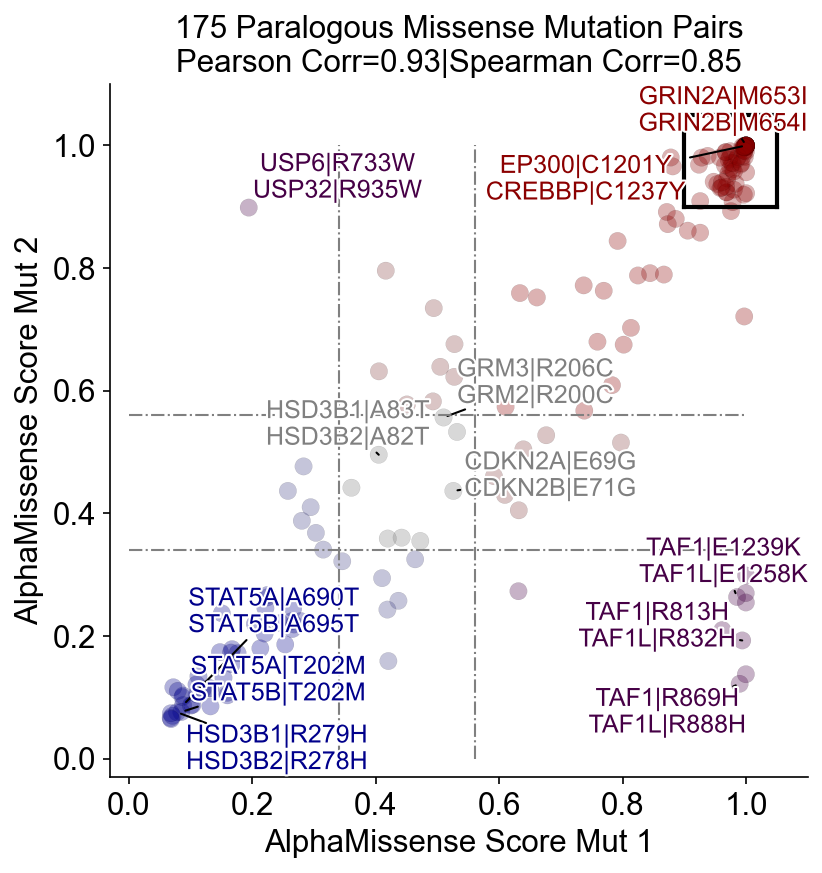

In [190]:
bbb1 = df_h2m[(df_h2m['am_pathogenicity_1'] >= .9997) & (df_h2m['am_pathogenicity_2'] >= .9997)].iloc[:2,:]
bbb2 = df_h2m[(df_h2m['am_pathogenicity_1'] >= .4) & (df_h2m['am_pathogenicity_1'] <= .6) & (df_h2m['am_pathogenicity_2'] <= .6) & (df_h2m['am_pathogenicity_2'] >= .4)].iloc[:3,:]
bbb3 = df_h2m[(df_h2m['am_pathogenicity_1'] <= .097) & (df_h2m['am_pathogenicity_2'] <= .097) ].iloc[:3,:]
bbb4 = df_h2m[(df_h2m['am_pathogenicity_1'] <= .3) & (df_h2m['am_pathogenicity_2'] >= .8)].iloc[:3,:]
bbb5 = df_h2m[(df_h2m['am_pathogenicity_1'] >= .8) & (df_h2m['am_pathogenicity_2'] <= .3)].iloc[:3,:]

bb2 = pd.concat((bbb1, bbb2,bbb3, bbb4, bbb5))

t = [f'{p}|{x}\n{q}|{y}' for p,q,x,y in zip(bb2['Hugo_Symbol_1'], bb2['Hugo_Symbol_2'],bb2['HGVSp_h_1'], bb2['HGVSp_h_2'])]
x = list(bb2['am_pathogenicity_1'])
y = list(bb2['am_pathogenicity_2'])



fig, ax = plt.subplots(figsize=(6, 6), dpi=150)
ax.plot([0, 1], [0.56, 0.56], linewidth=1, linestyle='-.', color='grey')
ax.plot([0, 1], [0.34, 0.34], linewidth=1, linestyle='-.', color='grey')

ax.plot( [0.56, 0.56], [0, 1],linewidth=1, linestyle='-.', color='grey')
ax.plot([0.34, 0.34], [0, 1], linewidth=1, linestyle='-.', color='grey')


ax.plot([.9, 1.05], [0.9, 0.9], linewidth=2, linestyle='-', color='black')
ax.plot([.9, 1.05], [1.05, 1.05], linewidth=2, linestyle='-', color='black')

ax.plot( [1.05, 1.05],[.9, 1.05],linewidth=2, linestyle='-', color='black')
ax.plot([0.9, 0.9],[.9, 1.05], linewidth=2, linestyle='-', color='black')

c = list(bb2['color_score'])
ax.scatter(data=df_h2m, x='am_pathogenicity_1', y='am_pathogenicity_2', c = 'color_score', alpha=.3, s=70, edgecolor='black', linewidths=.1)

ax.set_xlim(-.03, 1.1)
ax.set_ylim(-.03, 1.1)
ax.set_ylabel(f"AlphaMissense Score Mut 2", fontsize=15)
ax.set_xlabel(f"AlphaMissense Score Mut 1", fontsize=15)
ax.set_title(f"{len(df_h2m)} Paralogous Missense Mutation Pairs\nPearson Corr={p_corr:.2f}|Spearman Corr={corr:.2f}", fontsize=15)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.tick_params(axis='both', which='major', labelsize=15)
texts = [ax.text(x[i], y[i], t[i], fontsize=12, color=c[i], path_effects=[PathEffects.withStroke(linewidth=2, foreground="w")]) for i in range(len(x))]
adjust_text(texts,only_move={'texts':'xy'}, ax=ax, arrowprops=dict(arrowstyle="-", linewidth=1, alpha=1, color='black'))
plt.savefig(f'/Users/kexindong/Documents/GitHub/Output/h2m_database/figures/flank_size/double_hit.pdf', bbox_inches='tight')
plt.show()

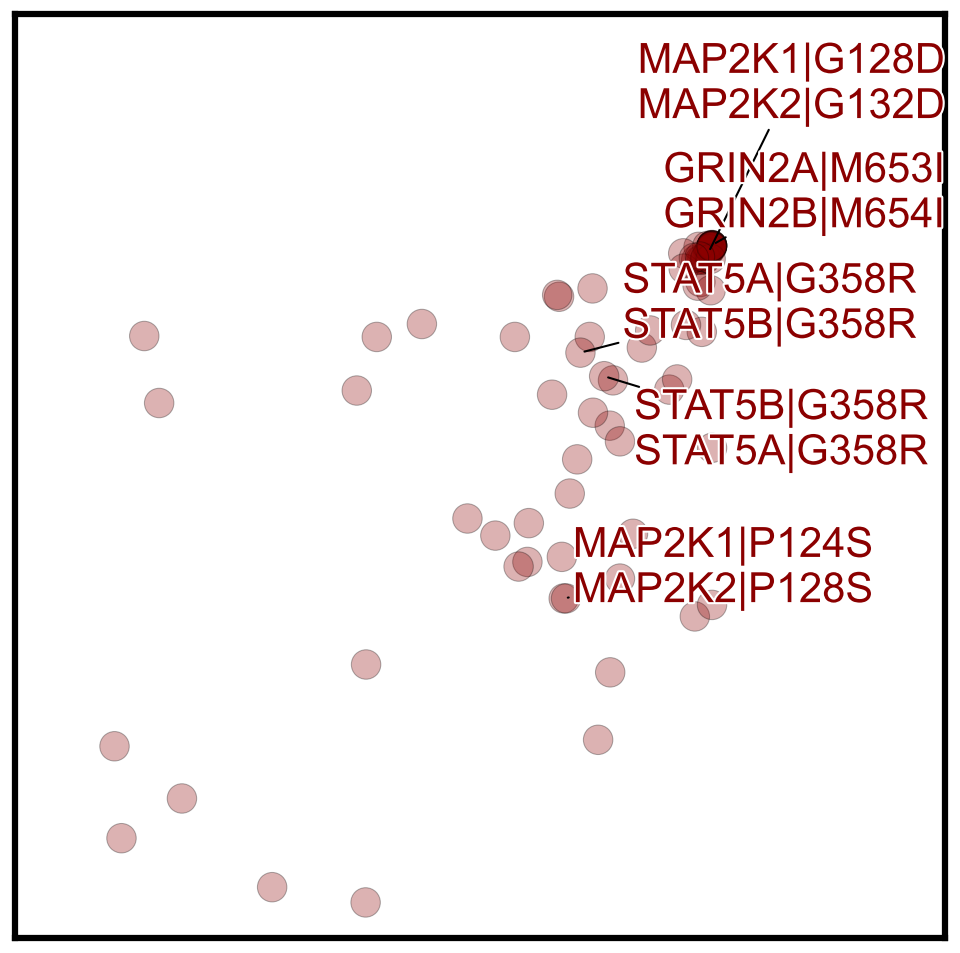

In [199]:
bbb1 = df_h2m[(df_h2m['am_pathogenicity_1'] >= .9) & (df_h2m['am_pathogenicity_2'] >= .9)].iloc[[2,6,8,35,47],:]

bb2 = bbb1

t = [f'{p}|{x}\n{q}|{y}' for p,q,x,y in zip(bb2['Hugo_Symbol_1'], bb2['Hugo_Symbol_2'],bb2['HGVSp_h_1'], bb2['HGVSp_h_2'])]
x = list(bb2['am_pathogenicity_1'])
y = list(bb2['am_pathogenicity_2'])

fig, ax = plt.subplots(figsize=(8, 8), dpi=150)
ax.plot([0, 1], [0.56, 0.56], linewidth=1, linestyle='-.', color='grey')
ax.plot([0, 1], [0.34, 0.34], linewidth=1, linestyle='-.', color='grey')

ax.plot( [0.56, 0.56], [0, 1],linewidth=1, linestyle='-.', color='grey')
ax.plot([0.34, 0.34], [0, 1], linewidth=1, linestyle='-.', color='grey')

c = list(bb2['color_score'])
ax.scatter(data=df_h2m, x='am_pathogenicity_1', y='am_pathogenicity_2', c = 'color_score', alpha=.3, s=200, edgecolor='black', linewidths=.5)

ax.set_xlim(.85, 1.05)
ax.set_ylim(.85, 1.05)
ax.set_ylabel(f"", fontsize=10)
ax.set_xlabel(f"", fontsize=10)
ax.set_title(f"", fontsize=10)
ax.spines['top'].set_linewidth(3)  
ax.spines['bottom'].set_linewidth(3) 
ax.spines['left'].set_linewidth(3) 
ax.spines['right'].set_linewidth(3) 
boundaries_ = []
ax.xaxis.set_ticks(boundaries_)
ax.xaxis.set_ticklabels(boundaries_, size=30, fontweight=100)
ax.yaxis.set_ticks(boundaries_)
ax.yaxis.set_ticklabels(boundaries_, size=30, fontweight=100)
texts = [ax.text(x[i], y[i], t[i], fontsize=20, color=c[i], path_effects=[PathEffects.withStroke(linewidth=2, foreground="w")]) for i in range(len(x))]
adjust_text(texts,only_move={'texts':'xy'}, ax=ax, arrowprops=dict(arrowstyle="-", linewidth=1, alpha=1, color='black'))
plt.savefig(f'/Users/kexindong/Documents/GitHub/Output/h2m_database/figures/paralog/double_hit_paralog_score_colored_zoom.pdf', bbox_inches='tight')
plt.show()